Asumimos que south korea es el que ha llevado mejor el control del coronavirus 
y ha hecho los tests a toda la poblacion infectada.
Podemos hacer una aproximacion del recovery rate mirando los datos de south korea.
Suponiendo tambien que recovery rate es un valor constante

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#we have data of:
# -Deaths
# -Confirmed
# -Infected
# Recovered = Confirmed - Infected - Deaths

In [24]:
df_confirmed = pd.read_csv('database/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('database/time_series_covid19_deaths_global.csv')

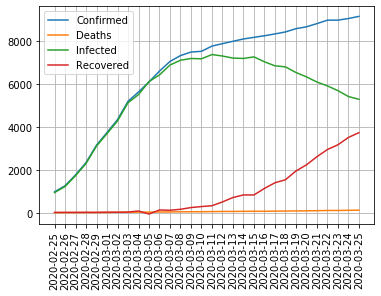

In [25]:
#Data from 25 FEB a 25 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-02-25')
end = pd.Timestamp('2020-03-25')
t = np.linspace(start.value, end.value, 30)
t = pd.to_datetime(t).date
t = np.asarray(t)


country = 'Korea, South'

confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns.values[38:]].values.reshape(-1)
deaths = df_death[df_death['Country/Region'] == country][df_death.columns.values[38:]].values.reshape(-1)
infected = np.array([944,1225,1729,2297,3109,3685,4277,5120,5498,6107,6415,6875,7097,7178,7165,
                    7362,7293,7198,7180,7253,7024,6838,6789,6527,6325,6085,5904,5684,5410,5281])
recovered = confirmed - infected - deaths

plt.plot(t,confirmed,label='Confirmed')
plt.plot(t,deaths,label='Deaths')
plt.plot(t,infected,label='Infected')
plt.plot(t,recovered,label='Recovered')

plt.xticks(t, t, rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [26]:
def get_rr(dR,I):
    """
    from SIR model, dR/dt = rr * I 
    rr = (dR/dt) / I
    """
    return dR/I

rr_vector = []
for i in range(len(recovered)-1):
    dr = recovered[i+1]-recovered[i]
    rr = get_rr(dr, recovered[i])
    rr_vector.append(rr)

In [27]:
rr_vector

[0.043478260869565216,
 0.0,
 0.125,
 -0.07407407407407407,
 0.36,
 -0.11764705882352941,
 0.26666666666666666,
 1.3157894736842106,
 -1.6136363636363635,
 -3.5185185185185186,
 -0.10294117647058823,
 0.36885245901639346,
 0.47904191616766467,
 0.1902834008097166,
 0.1326530612244898,
 0.5315315315315315,
 0.4019607843137255,
 0.16643356643356644,
 0.0,
 0.36330935251798563,
 0.23218997361477572,
 0.099214846538187,
 0.2642857142857143,
 0.14689265536723164,
 0.16972682489923868,
 0.12787136294027565,
 0.0746775288526816,
 0.10770688566013897,
 0.06358711149130311]

In [28]:
#claramente hay datos que no estan bien, asi que asumiremos los ultimos 8 dias para hacer el rr.
np.mean(rr_vector[-8:])

0.13174536625434635

In [ ]:
r = 0.1317